In [3]:
toutesLesNotes = []
for i in range (5):
    prenom = input("What is your name ? ")
    age = input("How old are you ? ")
    notes=[]
    for j in range (5):
        note = input("What grade have you in module number " + str(j) + " ? ")
        notes.append(note)
    toutesLesNotes.append(notes)

for i in range (5):
    averageGrade = 0
    minimumGrade = toutesLesNotes[i][0]
    maximumGrade = toutesLesNotes[i][0]
    for j in range (5):
        if minimumGrade > toutesLesNotes[j][i]:
            minimumGrade = toutesLesNotes[j][i]
        if maximumGrade < toutesLesNotes[j][i]:
            maximumGrade = toutesLesNotes[j][i]
        averageGrade+=int(toutesLesNotes[j][i])
    print("La note minimale du module " + str(i) + " est : " + str(minimumGrade))
    print("La note maximale du module " + str(i) + " est : " + str(maximumGrade))
    print(str(averageGrade / 5))

KeyboardInterrupt: 

Lines: 392
Chars: 225702
Words: 5345
['<!DOCTYPE', 'html>', '<!--', 'saved', 'from', 'url=(0023)https://www.google.com/', '-->', '<html', 'itemscope=""', 'itemtype="http://schema.org/WebPage"', 'lang="en-FR"><head><meta', 'http-equiv="Content-Type"', 'content="text/html;', 'charset=UTF-8"><meta', 'content="origin"', 'name="referrer"><meta', 'content="/images/branding/googleg/1x/googleg_standard_color_128dp.png"', 'itemprop="image"><meta', 'content="origin"', 'name="referrer"><title>Google</title><script']
['1==b.nodeType})};', 'INPUT', 'screen', '.gb_D:hover,.gb_j', '<!--', 'Mb="",Nb=function(){var', 'L=function(){this.i=[];this.a=0;this.h=null;this.j=!1};L.prototype.g=function(){if(this.j)return', '#f2f2f2;border-radius:4px;color:#5F6368;cursor:pointer;font-family:arial,sans-serif;font-size:14px;margin:11px', 'gb_i"><a', '470px', '_.Jd(this.o,a)};_.h.Hc=function(a,b){a.appendChild(b)};_.h.zf=_.Hg;_.h.Ic=_.Ig;_.h.nh=_.Jg;_.h.yf=_.Lg;_.Og=function(a){return', 'a?a:function(b,c){return-1
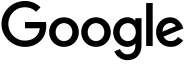

In [4]:
linesNumber, charsNumber, wordsNumber = 0, 0, 0
wordsList = []
with open("data/page.html", "r") as file:
    
    for line in file:
        linesNumber +=1
        charsNumber += len(line)
        
        words = line.split()
        
        wordsNumber += len(words)
        wordsList.extend(words)
        
print("Lines: "+str(linesNumber))
print("Chars: "+str(charsNumber))
print("Words: "+str(wordsNumber))

# First 20 words
print(wordsList[:20])

# Uniques words
# /!\ Change the order
distinctWords = list(set(wordsList))
print(distinctWords)
print("Uniques words: "+str(len(distinctWords)))

In [5]:
year = 0
minimumPop = 600000000
maximumPop = 0
yearMaxPop = 0
yearMinPop = 0
premiereLigne = 1
with open("data/population.csv", "r") as file:
    for line in file:
        x= line.split(",")
        if x[1] != "population\n":
            if int(x[1]) < minimumPop:
                minimumPop = int(x[1])
                yearMinPop = x[0]
            if int(x[1]) > maximumPop:
                maximumPop = int(x[1])
                yearMaxPop = x[0]
        
print("La population maximale " + str(maximumPop) + ", durant l'année " + str(yearMaxPop))
print("La population minimale " + str(minimumPop) + ", durant l'année " + str(yearMinPop))

La population maximale 66632870, durant l'année 2016
La population minimale 40681000, durant l'année 1901


In [6]:
from pandas.io.json import json_normalize
import pandas as pd
import json

jsondata = json.load(open('data/query.json'))
array = []

for data in jsondata:
  array.append([data['countryLabel'], data['year'], data['population']])
dataframe = pd.DataFrame(array, columns=['countryLabel', 'year', 'population'])
dataframe = dataframe.astype(dtype= {"countryLabel" : "<U200", "year" : "int64", "population" : "int64"})

sorted = dataframe.sort_values(by=["countryLabel","year"])
print(sorted)

     countryLabel  year  population
0     Afghanistan  1960     8774440
1     Afghanistan  1961     8953544
2     Afghanistan  1962     9141783
3     Afghanistan  1963     9339507
4     Afghanistan  1964     9547131
..            ...   ...         ...
995  Burkina Faso  1992     9297116
996  Burkina Faso  1993     9552473
997  Burkina Faso  1994     9816586
998  Burkina Faso  1995    10089876
999  Burkina Faso  1996    10372562

[1000 rows x 3 columns]


In [7]:
grouped = dataframe.groupby(['countryLabel'])["year","population"].max()
print(grouped)

                     year  population
countryLabel                         
Afghanistan          2018    34940837
Algeria              2017    41318142
Angola               2017    29784193
Antigua and Barbuda  2017      102012
Argentina            2019    44938712
Artsakh              2012      146600
Australia            2017    24511800
Austria              2017     8809212
Bahamas              2017      395361
Bahrain              2017     1492584
Bangladesh           2017   164669751
Barbados             2017      285719
Benin                2017    11175692
Bhutan               2017      807610
Bolivia              2017    11051600
Botswana             2017     2291661
Brazil               2018   208494900
Brunei               2017      428697
Bulgaria             2017     8981446
Burkina Faso         1996    10372562


In [8]:
maxedPop = grouped.loc[grouped['population'].idxmax()]
print(maxedPop)

minedPop =  grouped.loc[grouped['population'].idxmin()]
print(minedPop)

year               2018
population    208494900
Name: Brazil, dtype: int64
year            2017
population    102012
Name: Antigua and Barbuda, dtype: int64


In [9]:
from pandas.io.json import json_normalize
import pandas as pd
import json

jsondata = json.load(open('data/articles.json'))
array = []
#title, subjectLabel, year
for data in jsondata:
  array.append([data['title'], data['subjectLabel'], data['year']])
dataframe = pd.DataFrame(array, columns=['title', 'subjectLabel', 'year'])
dataframe = dataframe.astype(dtype= {"title" : "<U200", "subjectLabel" : "<U200", "year" : "int64"})

sorted = dataframe.groupby(["year","subjectLabel"]).count().reset_index()
print(sorted)

    year subjectLabel  title
0   2011       Canada     97
1   2011        Japan      1
2   2011        death      1
3   2011    happiness      1
4   2012       Canada    210
5   2012        Japan      5
6   2012        death      1
7   2013       Africa      3
8   2013       Canada    150
9   2013        Japan      4
10  2014       Africa      4
11  2014       Canada    188
12  2014        human      2
13  2015       Africa      4
14  2015       Canada    140
15  2015        Japan      2
16  2015        death      2
17  2016       Africa      1
18  2016       Canada    120
19  2016        Japan      5
20  2016        death      2
21  2017       Africa      7
22  2017       Canada     30
23  2017        Japan      1
24  2018       Africa      6
25  2018       Canada      4
26  2018        human      2
27  2019       Africa      6
28  2019       Canada      1


In [10]:
indexsMax = sorted.groupby('year')['title'].transform(max) == sorted["title"]
print(sorted[indexsMax])

    year subjectLabel  title
0   2011       Canada     97
4   2012       Canada    210
8   2013       Canada    150
11  2014       Canada    188
14  2015       Canada    140
18  2016       Canada    120
22  2017       Canada     30
24  2018       Africa      6
27  2019       Africa      6
